In [ ]:
import numpy as np
import pandas as pd
#import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
from sklearn.metrics import r2_score

import seaborn as sn

: 

In [2]:
from matplotlib import rcParams
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("vvn-movies2.csv")

In [4]:
df.head()

,movieID,name,year,Director,budget,marketing,boxOffice,studio,genre,imdb
0,1,Endgame,2018,Russo Brothers,350.0,150.0,3000,Marvel,team,7.6
1,2,Infinity War,2017,Russo Brothers,250.0,170.0,2400,Marvel,team,8.1
2,3,Iron Man,2008,Jon Favreau,150.0,100.0,760,Marvel,Sci-fi,8.1
3,4,Iron Man 2,2010,Jon Favreau,151.0,101.0,861,Marvel,Sci-fi,7.1
4,5,Iron Man 3,2012,Jon Favreau,200.0,120.0,862,Marvel,Sci-fi,6.8


In [5]:
df.drop(15,axis=0,inplace=True)
df.drop(19,axis=0,inplace=True)
df.drop(16,axis=0,inplace=True)

In [6]:

print(df.shape)

# print(df.feature_names)

print(df["imdb"].shape)

(17, 10)
(17,)


In [7]:
df.isnull().sum()

movieID      0
name         0
year         0
Director     0
budget       0
marketing    0
boxOffice    0
studio       0
genre        0
imdb         0
dtype: int64

In [8]:
X = df[["marketing","budget"]]
Y = df['boxOffice']


In [9]:
print("X")
X

X


,marketing,budget
0,150.0,350.0
1,170.0,250.0
2,100.0,150.0
3,101.0,151.0
4,120.0,200.0
5,50.0,120.0
6,120.0,170.0
7,200.0,270.0
8,80.0,100.0
9,120.0,201.0


In [10]:
print("Y")
Y

Y


0     3000
1     2400
2      760
3      861
4      862
5      640
6      940
7     1840
8      760
9     1200
10     976
11    1077
12     970
13    1120
14    2170
17     720
18    1024
Name: boxOffice, dtype: int64

<ipython-input-11-2c3fa5db8a6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


<AxesSubplot: >

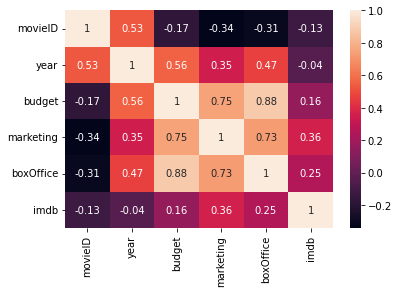

In [11]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sn.heatmap(data=correlation_matrix, annot=True)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.30, random_state=30)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

print(Y_train)

(11, 2)
(6, 2)
(11,)
(6,)
3      861
6      940
1     2400
17     720
2      760
7     1840
4      862
14    2170
13    1120
18    1024
5      640
Name: boxOffice, dtype: int64


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lm = LinearRegression()df.drop(19,axis=0,inplace=True)
lm.fit(X_train, Y_train)
df.drop(19,axis=0,inplace=True)
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 303.67085861716976
R2 score is 0.7372447171786523




In [14]:
# model evaluation for testing set
Y_pred = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))
r2 = r2_score(Y_test, Y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

# model evaluation for testing set
print(Y_pred.shape)
Y_pred

pd.DataFrame(Y_pred,Y_test)

The model performance for testing set
--------------------------------------
RMSE is 324.9987043948913
R2 score is 0.8162857636057536
(6,)


,0
boxOffice,
3000,2394.308298
976,1148.540363
1077,1159.400009
970,1323.190826
1200,1282.917879
760,445.828969


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

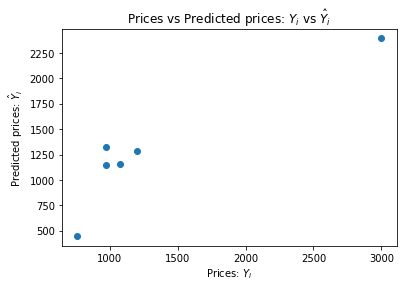

In [15]:
import matplotlib.pyplot as plt 
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [2]:
#Importing required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import metrics
from sklearn import tree


In [3]:
#Loading the iris data
data = load_iris()
print('Classes to predict: ', data.target_names)
print('Features: ', data.feature_names)
data.feature_names

Classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
import pandas as pd
iris = pd.DataFrame(data.data)
print(iris.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [37]:
df=pd.read_csv("vvn-movies2.csv")
df.drop(15,axis=0,inplace=True)
df.drop(19,axis=0,inplace=True)
df.drop(16,axis=0,inplace=True)

In [38]:
df.head()

,movieID,name,year,Director,budget,marketing,boxOffice,studio,genre,imdb
0,1,Endgame,2018,Russo Brothers,350.0,150.0,3000,Marvel,team,7.6
1,2,Infinity War,2017,Russo Brothers,250.0,170.0,2400,Marvel,team,8.1
2,3,Iron Man,2008,Jon Favreau,150.0,100.0,760,Marvel,Sci-fi,8.1
3,4,Iron Man 2,2010,Jon Favreau,151.0,101.0,861,Marvel,Sci-fi,7.1
4,5,Iron Man 3,2012,Jon Favreau,200.0,120.0,862,Marvel,Sci-fi,6.8


In [5]:
iris.columns = data.feature_names
iris.head()
iris['class'] = data.target
iris
#Extracting data attributes
X = iris.iloc[:,0:4]
### Extracting target/ class labels
y = iris.iloc[:,4] 

In [51]:
X=df.iloc[:,4:7]
y=pd.cut(x=df['imdb'],bins=[0,7.5,10],labels=[0,1])

In [78]:
print('Number of examples in the data:', X.shape)

#First four rows in the variable 'X'
print(X[:4])
y.head(4)
#Using the train_test_split to create train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.)

Number of examples in the data: (17, 3)
   budget  marketing  boxOffice
0   350.0      150.0       3000
1   250.0      170.0       2400
2   150.0      100.0        760
3   151.0      101.0        861


In [48]:
y

0     1
1     1
2     1
3     0
4     0
5     0
6     1
7     1
8     1
9     0
10    1
11    0
12    1
13    0
14    1
17    1
18    0
Name: imdb, dtype: category
Categories (2, int64): [0 < 1]

In [85]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [86]:
#Training the decision tree classifier. 
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [87]:
#Predicting labels on the test set.
y_pred_test =  clf.predict(X_test)


In [88]:
y_pred_train=clf.predict(X_train)
#pre-pruning
max_depth = []
acc = []
for i in range(1,30):
 dt_classifier = DecisionTreeClassifier(max_depth=i, random_state = 20)
 dt_classifier.fit(X_train, y_train)
 pred = dt_classifier.predict(X_test)
 acc.append(metrics.accuracy_score(y_test, pred))
 max_depth.append(i)
print(acc)
print(max(acc))

[0.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
0.5


In [91]:
depth = acc.index(max(acc)) + 1
depth

2

In [58]:
dt_classifier = DecisionTreeClassifier(max_depth=depth, dt_classifier = DecisionTreeClassifier(max_depth=depth,random_state = 20)

SyntaxError: unexpected EOF while parsing (<ipython-input-58-3b6ae9e773f8>, line 1)

In [83]:
dt_classifier=DecisionTreeClassifier(max_depth=depth,random_state=20)

In [89]:
dt_classifier.fit(X_train, y_train)
pred = dt_classifier.predict(X_test)
#pred
metrics.accuracy_score(y_test, pred)
#eater than t


0.5

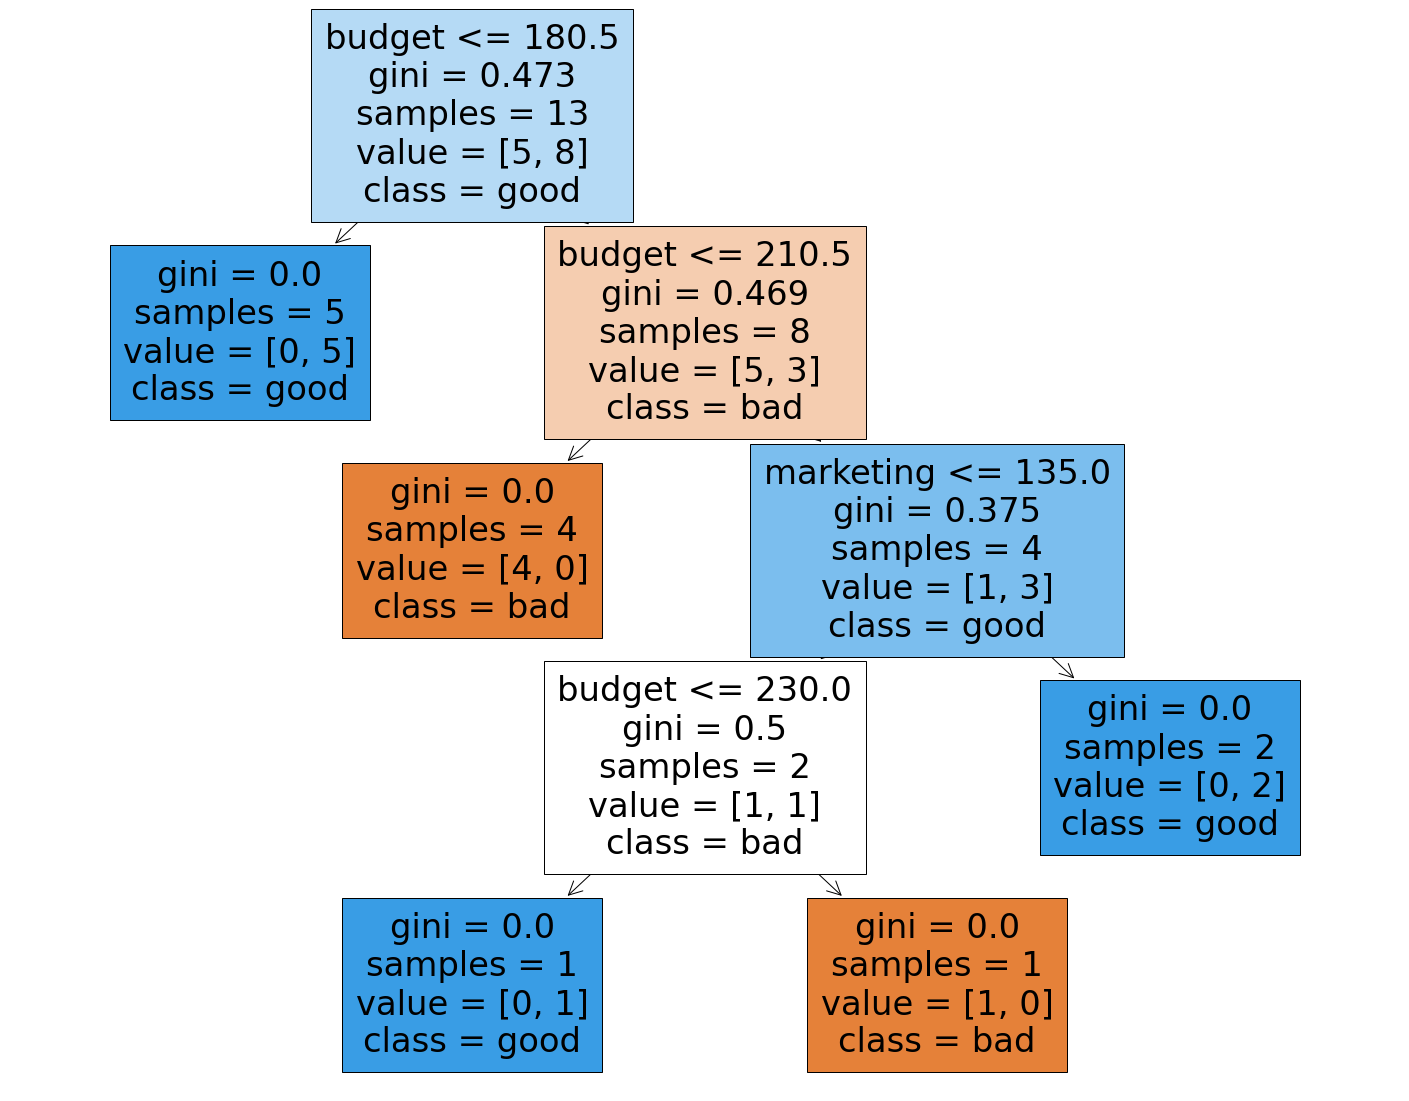

In [90]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["bad","good"],
                   filled=True)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [68]:
#params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
params = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 8],
              "max_depth": [None, 2, 3, 5, 7],
              "min_samples_leaf": [1, 3, 5, 7, 10],
              "max_leaf_nodes": [None, 3, 5, 7],
              }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=20), params,cv=10, scoring='accuracy')

In [69]:
grid_search_cv.fit(X_train, y_train)

grid_search_cv.best_estimator_

ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [34]:
# By default, GridSearchCV trains the best model found on the whole training set (you can change this by setting refit=False), 
#so we don't need to do it again. We can simply evaluate the model's accuracy:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8888888888888888

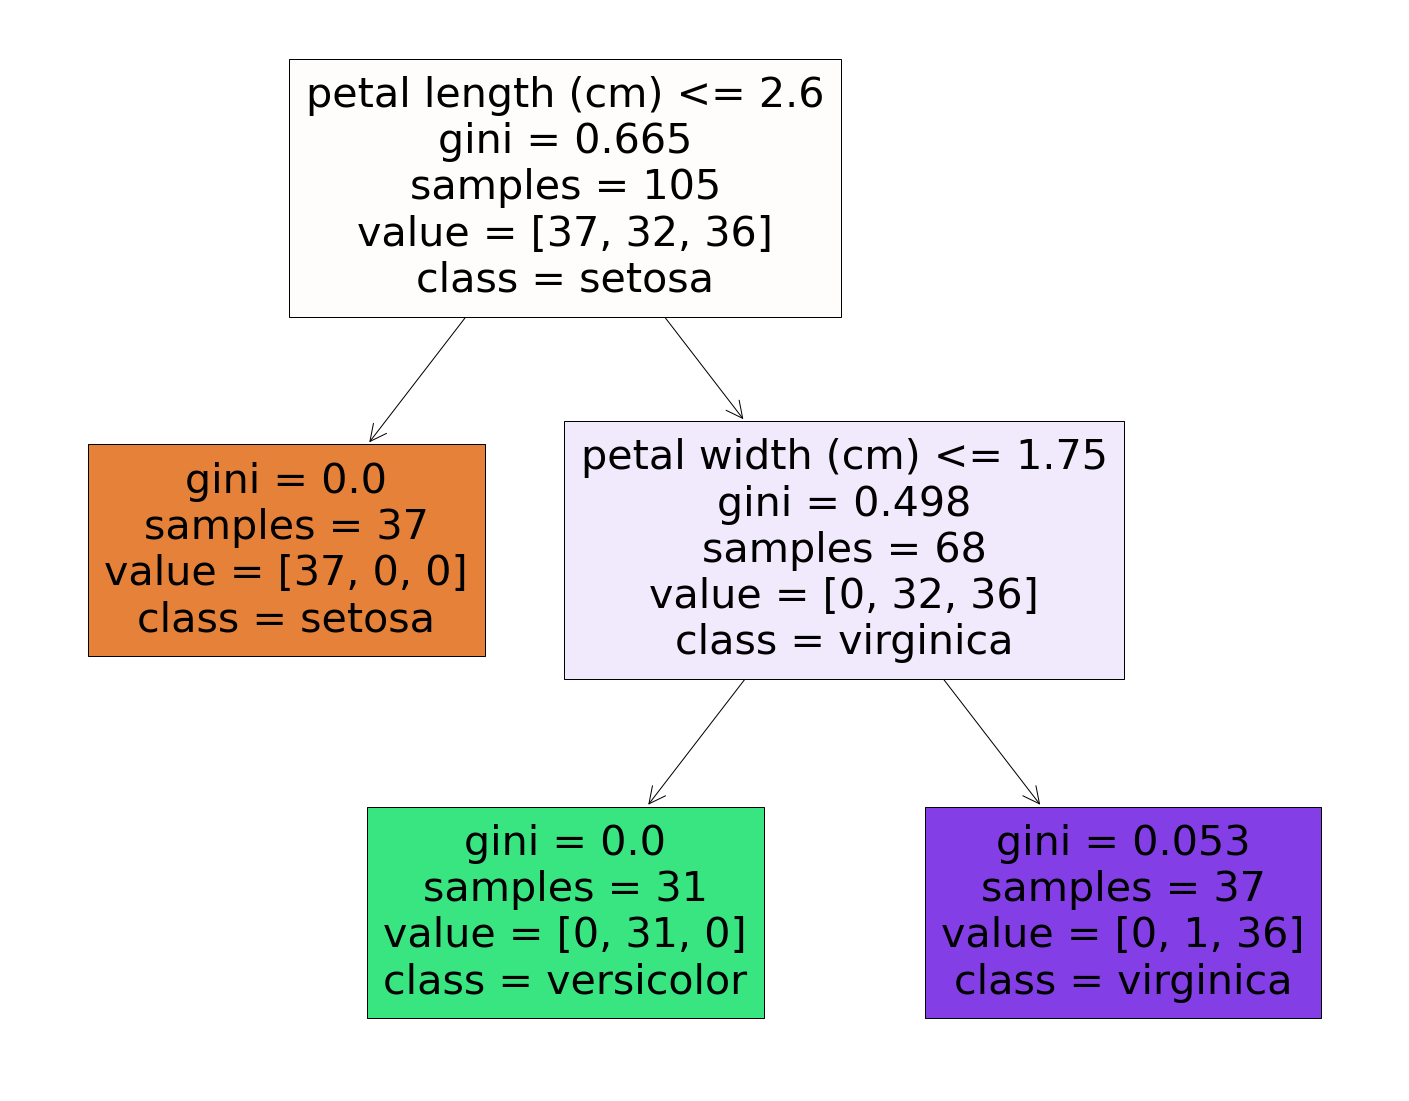

In [35]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["setosa", "versicolor" ,"virginica"],
                   filled=True)fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["setosa", "versicolor" ,"virginica"],
                   filled=True)